<a href="https://colab.research.google.com/github/Thecaiobr/Inteligencia-artifical/blob/main/Restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pydot
import pydotplus

In [23]:
# Ler dados do DataSet
col_names = ['Alternativo', 'Bar', 'SexSab', 'fome', 'Cliente', 'Preco', 'Chuva', 'Res', 'Tipo', 'Tempo', 'Conclusao']
dataset = pd.read_csv("/content/sample_data/Restaurante.csv", delimiter = ";",header=0, names=col_names)
dataset

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,out/30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,out/30,Nao


In [24]:
#realizando a etapa de pre-processamento, onde se transforma os dados nominais em numericos usando o labelEncoder
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()                    
dataset=dataset.apply(string_to_int.fit_transform) 
dataset

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,1,0,0,1,0,2,0,1,0,0,1
1,1,0,0,1,1,0,0,0,3,1,0
2,0,1,0,0,0,0,0,0,1,0,1
3,1,0,1,1,1,0,1,0,3,3,1
4,1,0,1,0,1,2,0,1,0,2,0
5,0,1,0,1,0,1,1,1,2,0,1
6,0,1,0,0,2,0,1,0,1,0,0
7,0,0,0,1,0,1,1,1,3,0,1
8,0,1,1,0,1,0,1,0,1,2,0
9,1,1,1,1,1,2,0,1,2,3,0


In [28]:
#dividir nossos dados em conjunto de atributos e rótulo:
feature_cols = ['Alternativo', 'Bar', 'SexSab', 'fome', 'Cliente', 'Preco', 'Chuva', 'Res', 'Tipo', 'Tempo']
X = dataset[feature_cols ]                               #contains the attribute 
y = dataset.Conclusao  

In [33]:
#dividir nossos dados em conjuntos de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [34]:
#Treinando e realizando predições
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)     # create a classifier object
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
#Prever a resposta para o conjunto de dados de teste
y_pred= classifier.predict(X_test)  

In [36]:
#testando a acuracia/precisao do modelo
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [37]:
#verificando valores previstos com os valores reais para testar a acuracia
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
11,1,0
10,0,0
5,1,1


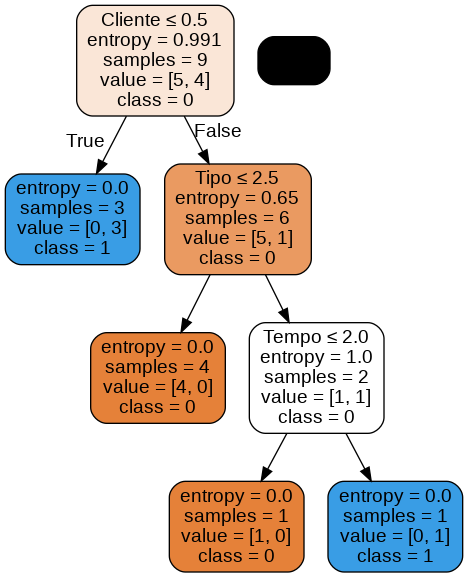

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Restaurante.png')
Image(graph.create_png())

In [39]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

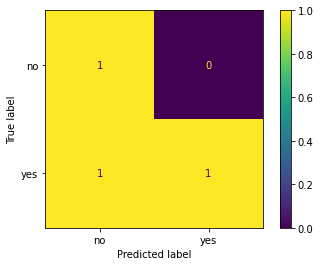

In [40]:
conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['no','yes'])
cmd.plot(values_format="d")
plt.show()

In [41]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, classifier.predict(X_test)))
print('\n')
print(classification_report(y_test, classifier.predict(X_test)))
print('\n')

tn, fp, fn, tp = confusion_matrix(y_test, classifier.predict(X_test)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Accuracy score =  0.6666666666666666


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



True negative rate: 1.0
False positive rate: 0.0
False negative rate: 0.5
True positive rate: 0.5
